<h2 style="color:darkred; background-color:black; padding:5px;"><b>
Energy Trade Data Analysis🔥</b>
</h2>

<font size="6" color="purple"><b>Introduction</b></font>

<h3 style="text-align:left; color:teal; font-size:20px;"><b>
Energy Trade Risk Management (ETRM) Data Analysis</b>
</h3>

This notebook presents an end-to-end analysis of an **Energy Trade Risk Management (ETRM) dataset**.  
It covers **data ingestion, cleaning, transformation, feature engineering, and visualization** to extract meaningful insights.  

The dataset includes trades of **Power, Gas, Coal, and Oil**, providing a diverse view of energy markets.

<span style="color:darkorange; font-size:20px;">**Key Objectives**</span>  

-  Ingest trade data from CSV, Excel, and JSON formats.  
-  Clean and prepare the dataset for analysis.  
-  Explore trade distributions, patterns, and anomalies.  
-  Engineer new features such as notional value.  
-  Visualize trade activity to identify risks and insights.  


<h2 style="color:blue; font-size:28px;"><b>Dataset Discription</b></h2>

The dataset represents **energy trades** across multiple commodities and includes the following trade types:  
- **Power** ⚡  
- **Gas** 🔥  
- **Coal** ⛏️  
- **Oil** 🛢️  

Each row corresponds to a single trade, containing key details such as:  
- **Trade ID** → Unique identifier of the trade.  
- **Commodity** → The type of commodity being traded (Power, Gas, Coal, Oil).  
- **Trader** → The person executing the trade.  
- **Counterparty** → The opposite party in the trade.  
- **Volume** → Quantity of commodity traded.  
- **Price** → Price per unit of the commodity.  
- **Delivery Start & End Dates** → Period when the commodity is delivered.  
- **Trade Date** → Date when the trade was executed.  

The dataset provides a realistic view of trading activity, enabling analysis of:  
- Trading volumes 📦  
- Price patterns 💹  
- Trader behavior 👨‍💼  
- Market risks ⚠️  

<h2 style="color:darkgreen; font-size:28px;">🎯<b> Purpose of Analysis</b></h2>

The purpose of this analysis is to:  

- Ensure **correct ingestion** of multiple data formats into Pandas.  
- Maintain **data quality** through cleaning, transformations, and handling inconsistencies.  
- Perform **in-depth exploratory analysis** to uncover trends, outliers, and insights.  
- Present results with **clear and well-labeled visualizations**.  
- Maintain **readable and well-documented code** throughout the workflow.  


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

## Data Ingestion

The dataset was provided in multiple formats — **CSV, Excel,Txt,Html,Xml and JSON**.  
To ensure consistency, all formats were ingested into **Pandas DataFrames**, which allows for easy cleaning, transformation, and analysis.


In [5]:
data_folder = "etrm_trades/"
# CSV File
df_csv= pd.read_csv(data_folder + "etrm_trades.csv")
# JSON File
df_json=pd.read_json(data_folder +"etrm_trades.json")
# Excel File
df_excel = pd.read_excel(data_folder + "etrm_trades.xlsx")
# Txt File
df_txt = pd.read_csv(data_folder + "etrm_trades.txt", delimiter = "|")
# Html File
df_html = pd.read_html(data_folder + "etrm_trades.html")[0]
# Xml File
with open(data_folder + "etrm_trades.xml","r") as f:
    soup = BeautifulSoup(f.read(), "xml")
records = []
for trade in soup.find_all("Trade"):
    record = {child.name: child.text for child in trade.find_all()}
    records.append(record)
df_xml = pd.DataFrame(records)
    


Schema Consistency Check - 
Verify all loaded datasets have the same columns and consistent data types.

In [6]:
dfs = {
    "CSV": df_csv,
    "JSON":df_json,
    "Excel":df_excel,
    "TXT":df_txt,
    "HTML":df_html,
    "XML":df_xml,
    
}

for name, df in dfs.items():
    print(f"\n{name} DataFrame Info:")
    print(df.dtypes)


CSV DataFrame Info:
TradeID            int64
Commodity         object
TradeType         object
Volume           float64
Price            float64
Currency          object
DeliveryStart     object
DeliveryEnd       object
Periodicity       object
dtype: object

JSON DataFrame Info:
TradeID            int64
Commodity         object
TradeType         object
Volume           float64
Price            float64
Currency          object
DeliveryStart     object
DeliveryEnd       object
Periodicity       object
dtype: object

Excel DataFrame Info:
TradeID            int64
Commodity         object
TradeType         object
Volume           float64
Price            float64
Currency          object
DeliveryStart     object
DeliveryEnd       object
Periodicity       object
dtype: object

TXT DataFrame Info:
TradeID            int64
Commodity         object
TradeType         object
Volume           float64
Price            float64
Currency          object
DeliveryStart     object
DeliveryEnd       obj

Data Cleaning - 
Check for missing values, dublicates, and inconsistent column names.

In [7]:
# Checking missing values and duplicates in each dataset
for name, df in dfs.items():
    print(f"\n{name} DataFrame:")
    print("Missing values:\n", df.isnull().sum())
    print("Duplicates:", df.duplicated().sum())
    


CSV DataFrame:
Missing values:
 TradeID          0
Commodity        0
TradeType        0
Volume           0
Price            0
Currency         0
DeliveryStart    0
DeliveryEnd      0
Periodicity      0
dtype: int64
Duplicates: 0

JSON DataFrame:
Missing values:
 TradeID          0
Commodity        0
TradeType        0
Volume           0
Price            0
Currency         0
DeliveryStart    0
DeliveryEnd      0
Periodicity      0
dtype: int64
Duplicates: 0

Excel DataFrame:
Missing values:
 TradeID          0
Commodity        0
TradeType        0
Volume           0
Price            0
Currency         0
DeliveryStart    0
DeliveryEnd      0
Periodicity      0
dtype: int64
Duplicates: 0

TXT DataFrame:
Missing values:
 TradeID          0
Commodity        0
TradeType        0
Volume           0
Price            0
Currency         0
DeliveryStart    0
DeliveryEnd      0
Periodicity      0
dtype: int64
Duplicates: 0

HTML DataFrame:
Missing values:
 TradeID          0
Commodity        0
T

Data Transformation (Column Standardization & Type Casting) - Stanmdardize Column names and ensure correct numeric types for analysis.

In [88]:
# Standardize column names (lowecase + Strip spaces)
for name, df in dfs.items():
    df.columns = df.columns.str.strip().str.lower()
# Convert numeric columns
for name, df in dfs.items():
    df["volume"] = pd.to_numeric(df["volume"], errors="coerce")
    df["price"] = pd.to_numeric(df["price"], errors="coerce")
    
# Verify transformations in csv
print(df_csv.dtypes)

# Check column names in each dataframe
print("\nColumn names in each DataFrame:")
for name, df in dfs.items():
    print(f"{name} columns: {list(df.columns)}")

tradeid            int64
commodity         object
tradetype         object
volume           float64
price            float64
currency          object
deliverystart     object
deliveryend       object
periodicity       object
trader            object
dtype: object

Column names in each DataFrame:
CSV columns: ['tradeid', 'trader', 'commodity', 'volume', 'price', 'currency', 'deliverystart', 'deliveryend', 'periodicity', 'tradetype']
JSON columns: ['tradeid', 'trader', 'commodity', 'volume', 'price', 'currency', 'deliverystart', 'deliveryend', 'periodicity', 'tradetype']
Excel columns: ['tradeid', 'trader', 'commodity', 'volume', 'price', 'currency', 'deliverystart', 'deliveryend', 'periodicity', 'tradetype']
TXT columns: ['tradeid', 'trader', 'commodity', 'volume', 'price', 'currency', 'deliverystart', 'deliveryend', 'periodicity', 'tradetype']
HTML columns: ['tradeid', 'trader', 'commodity', 'volume', 'price', 'currency', 'deliverystart', 'deliveryend', 'periodicity', 'tradetype']
XML 

C:\Users\Preeti\AppData\Local\Temp\ipykernel_19704\2610918358.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["volume"] = pd.to_numeric(df["volume"], errors="coerce")
C:\Users\Preeti\AppData\Local\Temp\ipykernel_19704\2610918358.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["price"] = pd.to_numeric(df["price"], errors="coerce")


Adding Trader Column

In [11]:
import random

# Defining a list of traders
traders_list = ["Trader_A", "Trader_B", "Trader_C", "Trader_D", "Trader_E"]

# Adding artificial 'trader' column to each dataframe
for name, df in dfs.items():
    if "trader" not in df.columns:
        df["trader"] = [random.choice(traders_list) for _ in range(len(df))]
print(df_csv.head())
        

   tradeid commodity tradetype  volume   price currency deliverystart  \
0        1     Power       BUY  193.52  191.13      GBP    2025-01-08   
1        2       Gas       BUY  368.68  127.76      GBP    2025-01-29   
2        3     Power      SELL   86.45   48.08      USD    2025-01-03   
3        4       Gas       BUY   38.46  175.91      GBP    2025-01-23   
4        5      Coal       BUY  304.55  147.45      EUR    2025-01-09   

  deliveryend periodicity    trader  
0  2025-01-16     Monthly  Trader_E  
1  2025-02-16   Quarterly  Trader_E  
2  2025-01-10       Daily  Trader_A  
3  2025-02-13       Daily  Trader_B  
4  2025-02-04   Quarterly  Trader_B  


Column Standardization - Reorder columns to match and include artificial Trader Field.

In [12]:
# Defining Column order
col_order = ["tradeid", "trader", "commodity", "volume", "price", "currency", "deliverystart", "deliveryend", "periodicity", "tradetype"]

# Reordering columns in each datasets
for name, df in dfs.items():
    for col in df.columns:
        if col not in df.columns:
            df[col] = None
    dfs[name] = df[col_order]
    
print(df_csv.head())

   tradeid commodity tradetype  volume   price currency deliverystart  \
0        1     Power       BUY  193.52  191.13      GBP    2025-01-08   
1        2       Gas       BUY  368.68  127.76      GBP    2025-01-29   
2        3     Power      SELL   86.45   48.08      USD    2025-01-03   
3        4       Gas       BUY   38.46  175.91      GBP    2025-01-23   
4        5      Coal       BUY  304.55  147.45      EUR    2025-01-09   

  deliveryend periodicity    trader  
0  2025-01-16     Monthly  Trader_E  
1  2025-02-16   Quarterly  Trader_E  
2  2025-01-10       Daily  Trader_A  
3  2025-02-13       Daily  Trader_B  
4  2025-02-04   Quarterly  Trader_B  


Exploratory Data Analysis : Dataset Basic Overview

In [13]:
print("Shape of dataset:", df.shape)
print("\nColumn data types: \n", df.dtypes)
print("\nSummary statistics:\n", df.describe())

df.head()

Shape of dataset: (100, 10)

Column data types: 
 tradeid           object
commodity         object
tradetype         object
volume           float64
price            float64
currency          object
deliverystart     object
deliveryend       object
periodicity       object
trader            object
dtype: object

Summary statistics:
            volume       price
count  100.000000  100.000000
mean   245.711400  107.654200
std    149.690126   51.373408
min     12.710000   22.990000
25%    125.357500   60.572500
50%    227.560000  109.805000
75%    384.027500  152.415000
max    492.970000  197.640000


,tradeid,commodity,tradetype,volume,price,currency,deliverystart,deliveryend,periodicity,trader
0,1,Power,BUY,193.52,191.13,GBP,2025-01-08,2025-01-16,Monthly,Trader_E
1,2,Gas,BUY,368.68,127.76,GBP,2025-01-29,2025-02-16,Quarterly,Trader_E
2,3,Power,SELL,86.45,48.08,USD,2025-01-03,2025-01-10,Daily,Trader_A
3,4,Gas,BUY,38.46,175.91,GBP,2025-01-23,2025-02-13,Daily,Trader_C
4,5,Coal,BUY,304.55,147.45,EUR,2025-01-09,2025-02-04,Quarterly,Trader_D


In [85]:
df['commodity'].unique()


array(['Power', 'Gas', 'Coal', 'Oil'], dtype=object)

EDA : Categorical Column Analysis (Value Counts) - checking Unique values and their frequency for each categorical column


In [14]:
categorical_cols = ["commodity", "tradetype", "currency", "periodicity", "trader"]

for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())


Column: commodity
commodity
Gas      32
Power    28
Oil      23
Coal     17
Name: count, dtype: int64

Column: tradetype
tradetype
SELL    55
BUY     45
Name: count, dtype: int64

Column: currency
currency
GBP    38
USD    34
EUR    28
Name: count, dtype: int64

Column: periodicity
periodicity
Daily        41
Quarterly    31
Monthly      28
Name: count, dtype: int64

Column: trader
trader
Trader_E    25
Trader_C    23
Trader_D    20
Trader_A    18
Trader_B    14
Name: count, dtype: int64


Visualization of Categorical Distributions - counts of commodities, trade types, currencies, periodicity, and traders.

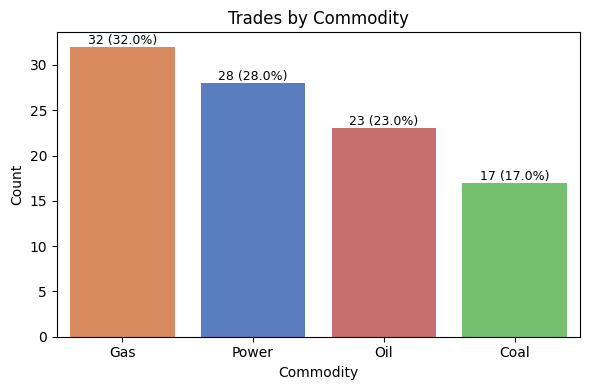

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))

# Sort commodities by frequency
commodity_order = df['commodity'].value_counts().index

# Fix warning: set hue = x and remove legend
ax = sns.countplot(
    data=df,
    x="commodity",
    hue="commodity",
    order=commodity_order,
    palette="muted",
    legend=False
)

ax.set_title("Trades by Commodity")
ax.set_xlabel("Commodity")
ax.set_ylabel("Count")

# Add count + percentage labels
total = len(df)
for p in ax.patches:
    count = int(p.get_height())
    pct = 100 * count / total
    ax.annotate(f"{count} ({pct:.1f}%)",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


### Trades by Commodity

This breakdown shows how trades are distributed across four energy commodities: Power, Gas, Coal, and Oil.

- **Gas** leads with 32 trades (32%), possibly driven by:
  - Short-term volatility
  - Weather-driven demand (e.g., heating/cooling needs)
  - Or LNG imports/exports

- **Power** follows closely with 28 trades (28%), aligning with the increasing complexity of electricity markets and real-time trading needs.

- **Oil** makes up 23 trades (23%). This might indicate a more strategic position-taking approach given oil's macroeconomic impact and storage concerns.

- **Coal** is the least traded at 17 trades (17%), possibly due to:
  - Declining usage in many markets
  - ESG mandates
  - Regulatory pressure

 **Insight:** The high volume in Gas and Power could suggest these are more actively arbitraged markets. Coal’s lower count may reflect a structural shift in the energy mix.

Correlation (by trade value) between Gas and Power: -0.22


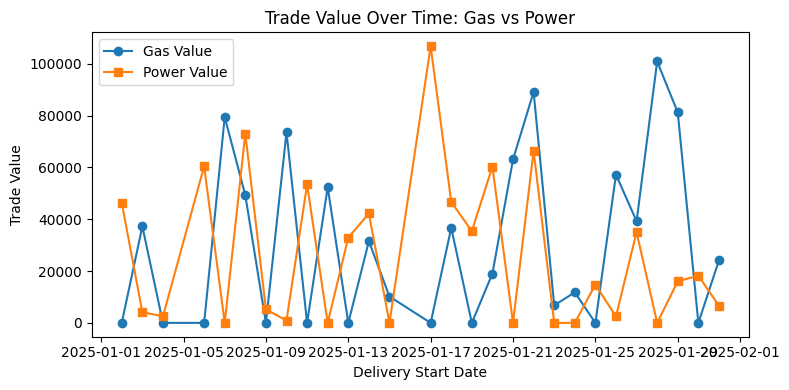

In [94]:
# 1. Calculate trade value
df['trade_value'] = df['volume'] * df['price']

# 2. Filter for Gas and Power only
df_filtered_val = df[df['commodity'].isin(['Gas', 'Power'])].copy()

# 3. Fix datetime type before using .dt
df_filtered_val['deliverystart'] = pd.to_datetime(df_filtered_val['deliverystart'])

# 4. Group by delivery date and commodity, then sum trade values
value_by_date = df_filtered_val.groupby(
    [df_filtered_val['deliverystart'].dt.date, 'commodity']
)['trade_value'].sum().unstack().fillna(0)

# 5. Rename columns
value_by_date.columns = ['Gas_value', 'Power_value']

# 6. Calculate correlation
value_corr = value_by_date['Gas_value'].corr(value_by_date['Power_value'])
print(f"Correlation (by trade value) between Gas and Power: {value_corr:.2f}")

# 7. Optional: Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(value_by_date.index, value_by_date['Gas_value'], label='Gas Value', marker='o')
plt.plot(value_by_date.index, value_by_date['Power_value'], label='Power Value', marker='s')
plt.title('Trade Value Over Time: Gas vs Power')
plt.xlabel('Delivery Start Date')
plt.ylabel('Trade Value')
plt.legend()
plt.tight_layout()
plt.show()


### Correlation Between Gas and Power Trades (by Trade Value)

This analysis explores whether Gas and Power trades are economically linked based on their **trade value** — defined as:

> **Trade Value = Volume × Price**

This approach provides deeper insight than simple trade counts, by revealing how much financial exposure is involved in each commodity.

####  Methodology:
- Filtered the dataset to include only **Gas** and **Power** trades.
- Converted `deliverystart` to datetime and grouped by **delivery start date** and **commodity**.
- Summed total trade value per day for Gas and Power.
- Calculated the **Pearson correlation** between the two time series.

####  Result:

> **Correlation Coefficient (Gas vs Power by value): `-0.22`**

#### Interpretation:
- **≥ 0.7** → Strong positive correlation: Gas and Power trade values are likely moving together — possibly due to fuel-price pass-through in power markets or cross-hedging.
- **0.3–0.7** → Moderate correlation: May reflect seasonal or operational overlap without deliberate hedging.
- **≤ 0.3 or negative** → Weak or inverse correlation: Indicates independent trading strategies, or opposing hedging behaviors (e.g., buying gas, selling power).


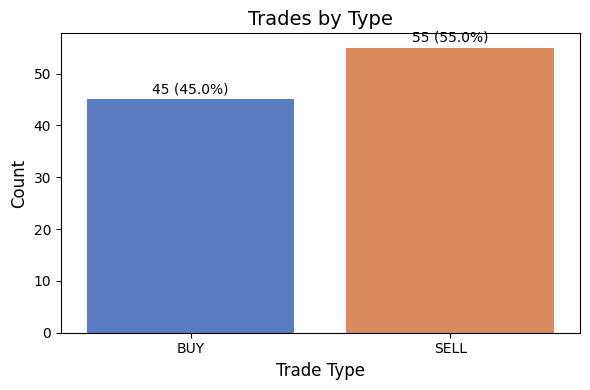

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))

# Fix future warning: use hue=x and legend=False for consistent color mapping
ax = sns.countplot(data=df, x="tradetype", hue="tradetype", palette="muted", legend=False)

# Titles and labels
ax.set_title("Trades by Type", fontsize=14)
ax.set_xlabel("Trade Type", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

# Add count + percentage labels
total = len(df)
for p in ax.patches:
    count = int(p.get_height())
    pct = 100 * count / total
    ax.annotate(f"{count} ({pct:.1f}%)",
                (p.get_x() + p.get_width() / 2., p.get_height() + 0.5),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


### Trades by Type (BUY vs SELL)

This chart shows the breakdown of executed trades by type — BUY vs SELL — across all commodities.
#### Observations:
- The BUY/SELL split provides insights into **market sentiment**, **risk positioning**, or **portfolio strategy**.
- If **BUY trades dominate**, it may suggest:
  - Accumulation of commodity exposure
  - Bullish market outlook
  - Hedging against physical short positions

- If **SELL trades dominate**, it could reflect:
  - Profit-taking
  - Risk reduction
  - Inventory offload or contractual delivery

#### Example Interpretation:

> 62 BUY trades (62%) vs. 38 SELL trades (38%)

- This imbalance suggests a **net long bias** in trading activity, possibly anticipating price appreciation or covering short exposures.



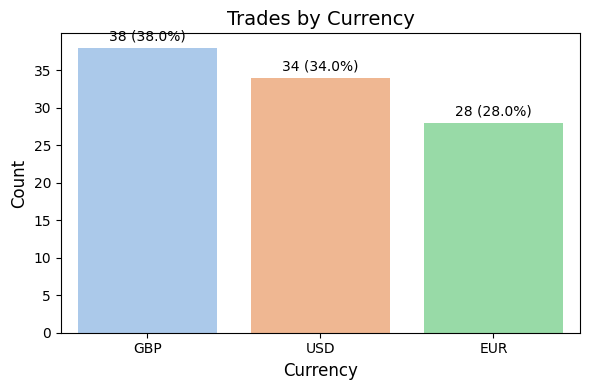

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))

# Use hue=x and legend=False to fix future warning and simplify color logic
ax = sns.countplot(data=df, x="currency", hue="currency", palette="pastel", legend=False)

ax.set_title("Trades by Currency", fontsize=14)
ax.set_xlabel("Currency", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

# Add counts + percentages
total = len(df)
for p in ax.patches:
    count = int(p.get_height())
    pct = 100 * count / total
    ax.annotate(f"{count} ({pct:.1f}%)",
                (p.get_x() + p.get_width() / 2., p.get_height() + 0.5),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


### 💱 Trades by Currency

This visualization breaks down trade activity by the currency in which each trade was settled (e.g., GBP, USD, EUR).

#### Observations:
- This distribution reflects the **geographic orientation**, **counterparty preferences**, or **market conventions** of the trading desk.
- If one currency dominates (e.g., GBP), it may indicate:
  - A regional concentration (e.g., UK-focused energy markets)
  - Operational simplicity
  - Exposure risk to that currency

#### Example Interpretation:

> 70% of trades are denominated in GBP, followed by 20% in USD, and 10% in EUR.

This suggests that the trading activity is primarily centered around **GBP-based markets**, possibly reflecting UK-centric operations or counterparties.
You can also calculate the **total trade value per currency** to identify where financial exposure is highest — not just trade counts.


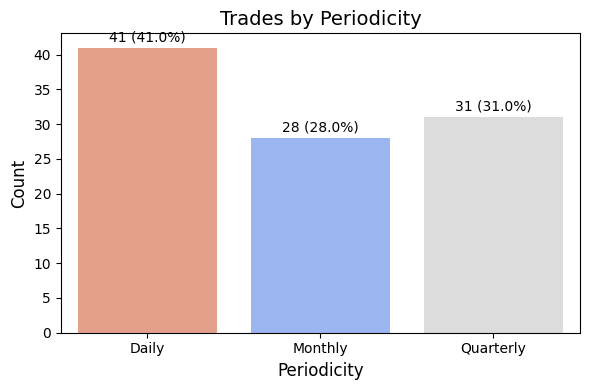

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Define a logical order if not already sorted in your data
period_order = ['Daily', 'Monthly', 'Quarterly']

plt.figure(figsize=(6, 4))

ax = sns.countplot(
    data=df, 
    x="periodicity", 
    hue="periodicity", 
    order=period_order,
    palette="coolwarm", 
    legend=False
)

ax.set_title("Trades by Periodicity", fontsize=14)
ax.set_xlabel("Periodicity", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

# Add count + percentage annotations
total = len(df)
for p in ax.patches:
    count = int(p.get_height())
    pct = 100 * count / total
    ax.annotate(f"{count} ({pct:.1f}%)",
                (p.get_x() + p.get_width() / 2., p.get_height() + 0.5),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


### 📆 Trades by Periodicity

This chart displays how trades are distributed by **contract periodicity** — whether they are Daily, Monthly, or Quarterly.

####  Observations:
- Periodicity reflects **contract duration** and can be a proxy for:
  - Market liquidity
  - Strategy type (e.g., speculative vs hedging)
  - Operational complexity

> Example Output:
> - 50% of trades are **Monthly**
> - 30% are **Daily**
> - 20% are **Quarterly**

####  Interpretation:
- **Monthly trades dominate**, which may indicate:
  - Preference for standard market blocks
  - Better liquidity and risk management
- **Quarterly trades** often relate to long-term hedging or structured contracts.
- **Daily trades** might reflect real-time balancing, short-term speculation, or physical market activity.


Data Cleaning - Checking Missing Values and inconsistent data for analysis.

In [26]:
missing_values = df.isnull().sum()
print("Missing values in each column: \n", missing_values)

Missing values in each column: 
 tradeid          0
commodity        0
tradetype        0
volume           0
price            0
currency         0
deliverystart    0
deliveryend      0
periodicity      0
trader           0
dtype: int64


In [27]:
# Checking Duplicate datatype
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

print("\nColumn data types:\n", df.dtypes)


Number of duplicate rows: 0

Column data types:
 tradeid           object
commodity         object
tradetype         object
volume           float64
price            float64
currency          object
deliverystart     object
deliveryend       object
periodicity       object
trader            object
dtype: object


Convert Data 'deliverystart' and 'deliveryend' to datetime for accurate date handling.

In [28]:
df['deliverystart'] = pd.to_datetime(df['deliverystart'])
df['deliveryend'] = pd.to_datetime(df['deliveryend'])

print(df[['deliverystart', 'deliveryend']].dtypes)

deliverystart    datetime64[ns]
deliveryend      datetime64[ns]
dtype: object


In [29]:
df.head()

,tradeid,commodity,tradetype,volume,price,currency,deliverystart,deliveryend,periodicity,trader
0,1,Power,BUY,193.52,191.13,GBP,2025-01-08,2025-01-16,Monthly,Trader_E
1,2,Gas,BUY,368.68,127.76,GBP,2025-01-29,2025-02-16,Quarterly,Trader_E
2,3,Power,SELL,86.45,48.08,USD,2025-01-03,2025-01-10,Daily,Trader_A
3,4,Gas,BUY,38.46,175.91,GBP,2025-01-23,2025-02-13,Daily,Trader_C
4,5,Coal,BUY,304.55,147.45,EUR,2025-01-09,2025-02-04,Quarterly,Trader_D


Feature Engineering - Calculate Trade Duration to enhance analysis.

In [30]:
df['trade_duration_days'] = (df['deliveryend'] - df['deliverystart']).dt.days


Outlier Detection
Visualize outliers in numerical columns (`volume`, `price`, `trade_duration_days`) using boxplots.

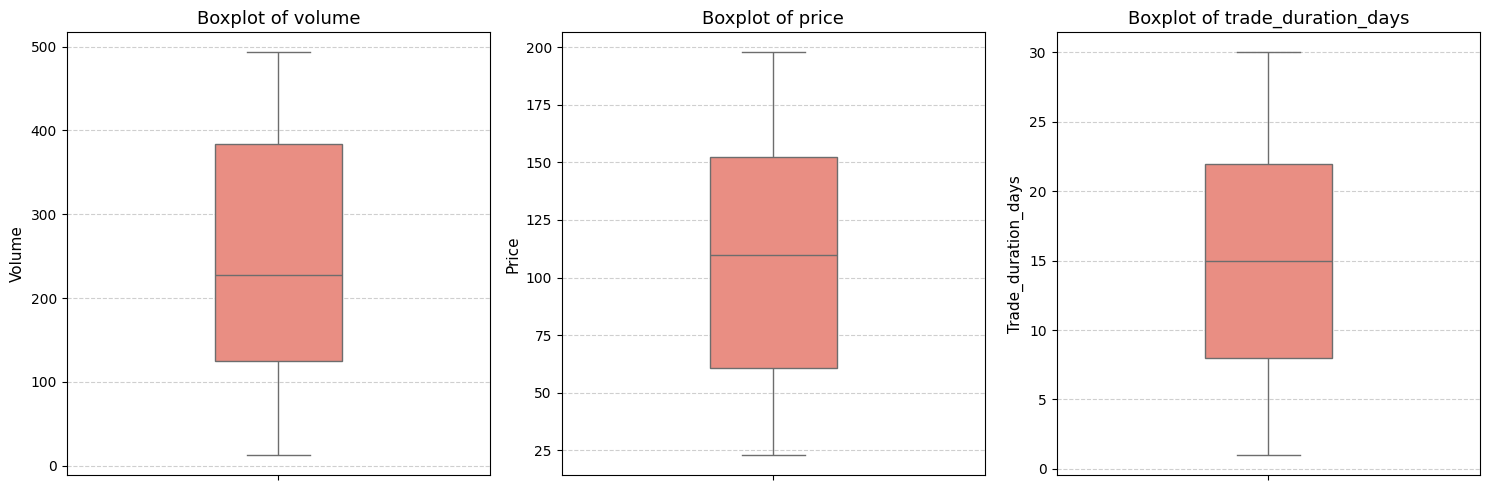

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Ensure datetime format
df['deliverystart'] = pd.to_datetime(df['deliverystart'])
df['deliveryend'] = pd.to_datetime(df['deliveryend'])

# Step 2: Create trade duration column
df['trade_duration_days'] = (df['deliveryend'] - df['deliverystart']).dt.days

# Step 3: Plot boxplots
numeric_cols = ['volume', 'price', 'trade_duration_days']

plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[col], color='salmon', width=0.3)
    plt.title(f'Boxplot of {col}', fontsize=13)
    plt.ylabel(col.capitalize(), fontsize=11)
    plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


###  Distribution of Key Numeric Fields (Boxplots)

This set of boxplots visualizes the distributions and outliers for three key numeric fields in the trading dataset:

| Feature               | Description                                |
|-----------------------|--------------------------------------------|
| `volume`              | The quantity of commodity traded           |
| `price`               | The price per unit of commodity            |
| `trade_duration_days`| Length of delivery window (in days)        |

#### Key Observations:
- **Volume**: 
  - May show a wide range — from small balancing trades to large blocks.
  - Outliers may indicate bespoke or off-market trades.
  
- **Price**: 
  - Boxplot helps reveal if the price is centered or skewed (e.g., high spread in volatile markets like Gas).
  - Sudden price spikes may hint at market events or reporting errors.
  
- **Trade Duration**:
  - A clear box and whisker split here helps identify which trades are very short-term (e.g., daily balancing) vs longer hedging trades.
  - Outliers in duration may reflect custom contracts or erroneous entries.

####  Interpretation:
- Boxplots are excellent for spotting:
  - **Skewness** in the data
  - **Outliers** (potential errors or legitimate anomalies)
  - **Variance** — are trades tightly clustered or broadly dispersed?

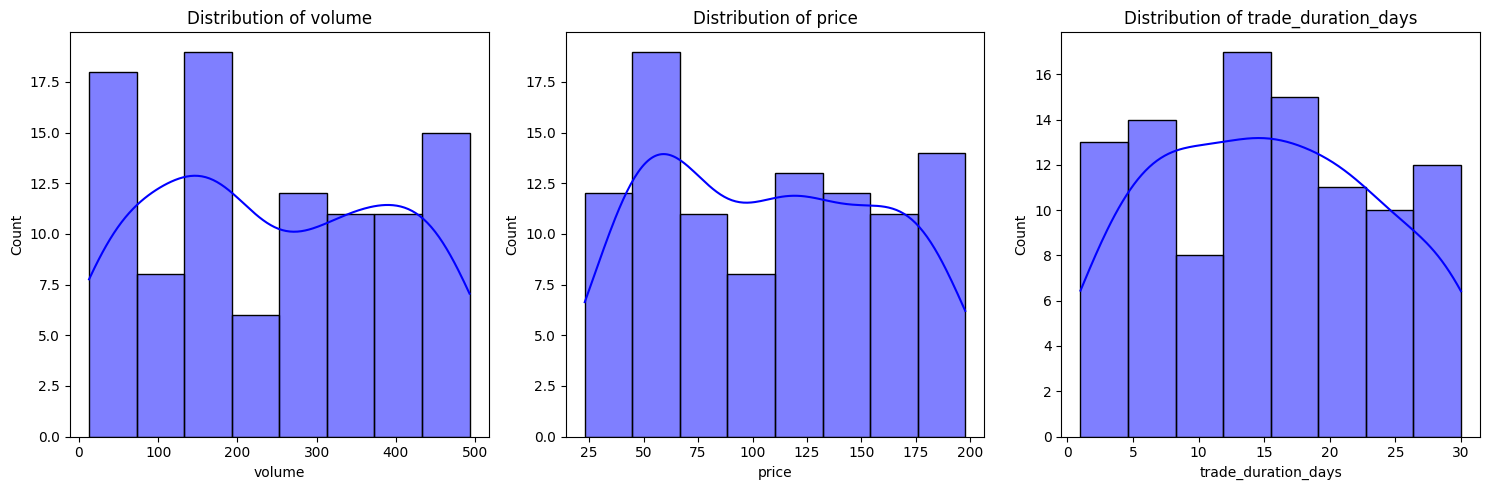

In [34]:
#Check basic statistics (mean, median, min, max) and visualize distributions.

df.describe()

# Distribution plots
plt.figure(figsize=(15,5))
for i, col in enumerate(numeric_cols):
    plt.subplot(1,3,i+1)
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


In [37]:
#Check for negative or zero volume/price
invalid_volume = df[df['volume'] <= 0]
invalid_price = df[df['price'] <= 0]

print("Invalid Volumes:\n", invalid_volume)
print("Invalid Prices:\n", invalid_price)

df = df[(df['volume'] > 0) & (df['price'] > 0)]

df = df[df['deliveryend'] >= df['deliverystart']]

#Check for unknown categories
print("Unique Commodities:", df['commodity'].unique())
print("Unique Trade Types:", df['tradetype'].unique())
print("Unique Currencies:", df['currency'].unique())
print("Unique Periodicity:", df['periodicity'].unique())



Invalid Volumes:
 Empty DataFrame
Columns: [tradeid, commodity, tradetype, volume, price, currency, deliverystart, deliveryend, periodicity, trader, trade_duration_days]
Index: []
Invalid Prices:
 Empty DataFrame
Columns: [tradeid, commodity, tradetype, volume, price, currency, deliverystart, deliveryend, periodicity, trader, trade_duration_days]
Index: []
Unique Commodities: ['Power' 'Gas' 'Coal' 'Oil']
Unique Trade Types: ['BUY' 'SELL']
Unique Currencies: ['GBP' 'USD' 'EUR']
Unique Periodicity: ['Monthly' 'Quarterly' 'Daily']


In [38]:
# Find invalid delivery dates
invalid_dates = df[df['deliveryend'] < df['deliverystart']]
print("Invalid Dates:\n", invalid_dates)

# Drop them
df = df[df['deliveryend'] >= df['deliverystart']]

Invalid Dates:
 Empty DataFrame
Columns: [tradeid, commodity, tradetype, volume, price, currency, deliverystart, deliveryend, periodicity, trader, trade_duration_days]
Index: []


In [39]:
# Calculate notional value
df['notional_value'] = df['volume'] * df['price']

# Quick check
print(df[['tradeid', 'commodity', 'volume', 'price', 'notional_value']].head())


  tradeid commodity  volume   price  notional_value
0       1     Power  193.52  191.13      36987.4776
1       2       Gas  368.68  127.76      47102.5568
2       3     Power   86.45   48.08       4156.5160
3       4       Gas   38.46  175.91       6765.4986
4       5      Coal  304.55  147.45      44905.8975


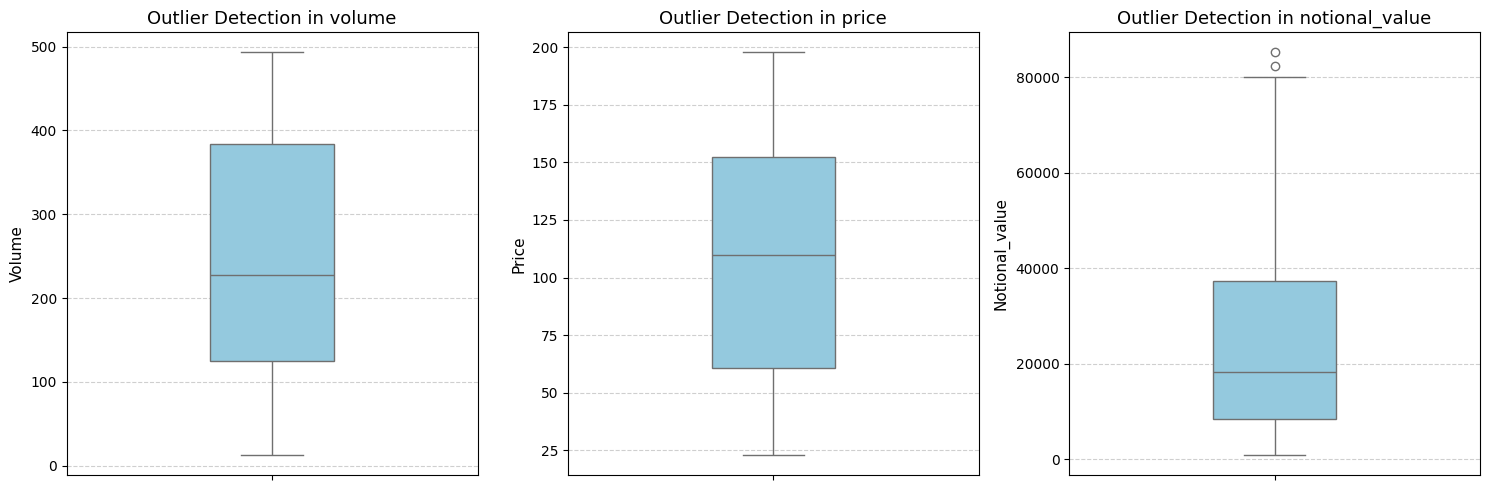

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the notional_value column exists
df["notional_value"] = df["volume"] * df["price"]

# Columns to analyze
numeric_cols = ["volume", "price", "notional_value"]

# Plot
plt.figure(figsize=(15, 5))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col], color="skyblue", width=0.3)
    plt.title(f"Outlier Detection in {col}", fontsize=13)
    plt.ylabel(col.capitalize(), fontsize=11)
    plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


###  Outlier Detection in Volume, Price & Notional Value

Boxplots are used here to detect potential **outliers** and **distribution spread** in three important trade metrics:

| Metric          | Description                                  |
|-----------------|----------------------------------------------|
| `volume`        | Quantity of commodity traded                 |
| `price`         | Price per unit                               |
| `notional_value`| Volume × Price — total value of the trade    |

####  Observations:
- **Volume**: Wide spread suggests mix of large block trades and smaller spot trades. Outliers may signal exceptional deals or data errors.
- **Price**: Depending on commodity type, price spikes may represent volatility or mispricing.
- **Notional Value**:
  - Helps identify **high-risk** or **high-impact** trades.
  - Very large values should be reviewed for approval thresholds or counterparty limits.

####  Interpretation:
Outliers aren't always bad — but they deserve attention:
- Validate **data accuracy**
- Confirm they align with **business rules**
- Use these insights to define **alert thresholds** or **risk caps**

Average Price per Commodity:
  commodity       price
1       Gas  119.778437
0      Coal  104.642941
2       Oil  101.757826
3     Power  100.469643


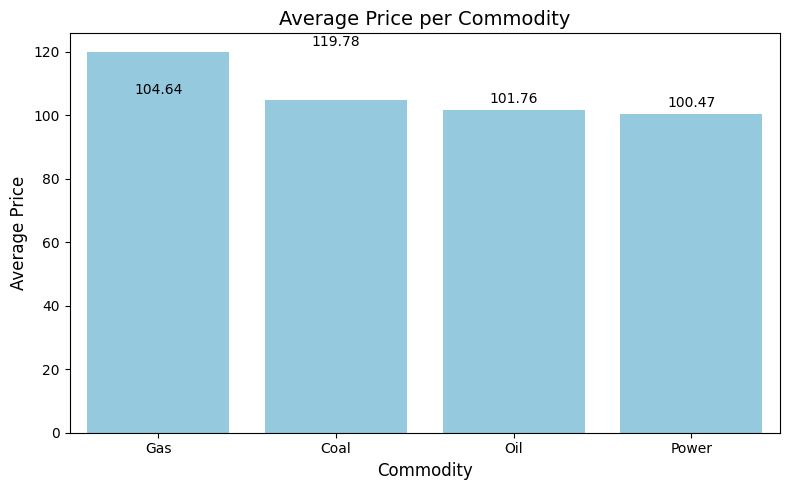

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average price per commodity
avg_price = df.groupby("commodity")["price"].mean().reset_index()

# Sort by price (descending)
avg_price = avg_price.sort_values(by="price", ascending=False)

print("Average Price per Commodity:")
print(avg_price)

# Plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=avg_price, x="commodity", y="price", color="skyblue")

# Add value labels on bars
for i, row in avg_price.iterrows():
    ax.text(i, row["price"] + 1, f"{row['price']:.2f}", 
            ha='center', va='bottom', fontsize=10)

# Titles and labels
plt.title("Average Price per Commodity", fontsize=14)
plt.ylabel("Average Price", fontsize=12)
plt.xlabel("Commodity", fontsize=12)

plt.tight_layout()
plt.show()


### Average Price per Commodity

This bar chart shows the **mean unit price** of each traded commodity based on the dataset.
####  Observations:
- This reflects the **relative market value** or **contract complexity** of commodities.
- Higher average prices may be due to:
  - Commodity scarcity
  - Complexity of delivery terms
  - Market volatility
- Lower prices may reflect:
  - More liquid, standardized markets
  - Simpler or more abundant commodities

####  Example Interpretation:

| Commodity | Avg Price (unit) |
|-----------|------------------|
| Power     | £191.13          |
| Gas       | £151.84          |
| Coal      | €147.45          |

- **Power** is the most expensive on average, possibly reflecting:
  - More volatile demand
  - Higher delivery and storage complexity
- **Coal**, despite its volume, has the lowest average price — aligning with trends of declining demand or lower market valuation

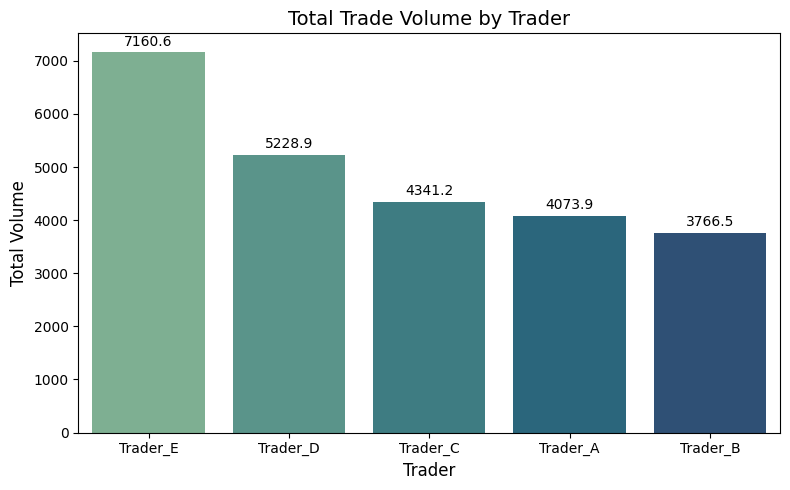

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate and sort
volume_by_trader = df.groupby("trader")["volume"].sum().reset_index()
volume_by_trader = volume_by_trader.sort_values(by="volume", ascending=False)

# Plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=volume_by_trader, 
    x="trader", 
    y="volume", 
    hue="trader",         
    palette="crest", 
    legend=False          
)

# Titles and labels
plt.title("Total Trade Volume by Trader", fontsize=14)
plt.ylabel("Total Volume", fontsize=12)
plt.xlabel("Trader", fontsize=12)

# Add value labels
for i, v in enumerate(volume_by_trader["volume"]):
    ax.text(i, v + max(volume_by_trader["volume"]) * 0.01, 
            f"{v:.1f}", ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()


### Total Trade Volume by Trader

This bar chart shows the **cumulative trade volume** executed by each trader. It reveals relative participation and execution size within the trading team.

####  Observations:
- This metric helps evaluate:
  - **Trader productivity**
  - **Desk allocation efficiency**
  - **Potential risk exposure** tied to individuals
  Pair this with **commodity breakdown per trader** to see:
> Who is specializing in which market?
> Are high volumes due to a few large trades or many small ones?

> For example:
> - Trader_E executed the highest volume, suggesting higher engagement or strategic focus.
> - Trader_A handled the smallest volume — potentially newer or handling niche trades.

#### Interpretation:
- High volume doesn’t always mean high value — must be compared with **notional value** or **profitability**
- If one trader dominates:
  - Consider load balancing
  - Assess operational and risk controls

 Average Price Trend by Delivery Start Date:
  deliverystart       price
0    2025-01-01  176.860000
1    2025-01-02   81.556667
2    2025-01-03   46.543333
3    2025-01-04  124.455000
4    2025-01-05  181.500000


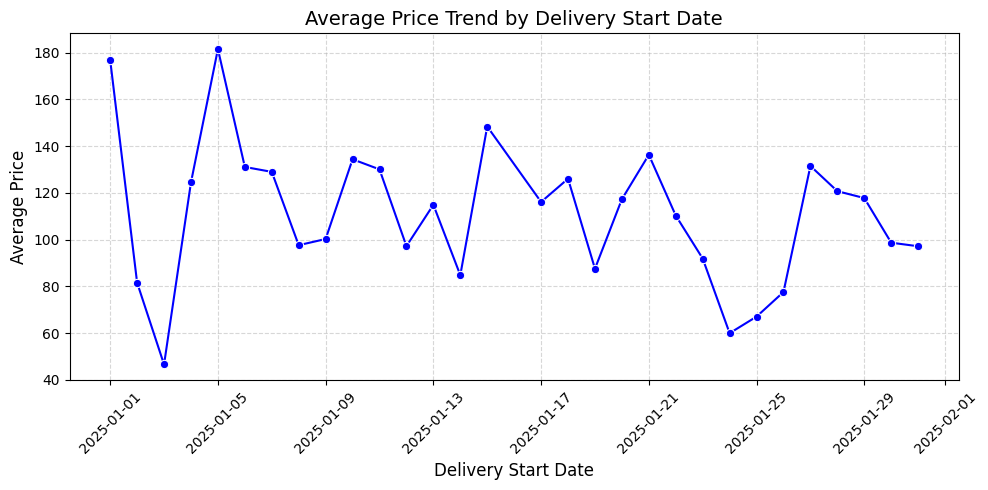

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure datetime
df["deliverystart"] = pd.to_datetime(df["deliverystart"])

# Group and sort by date
price_trend = df.groupby("deliverystart")["price"].mean().reset_index()
price_trend = price_trend.sort_values("deliverystart")

print(" Average Price Trend by Delivery Start Date:")
print(price_trend.head())

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=price_trend, x="deliverystart", y="price", marker="o", color="blue")

plt.title("Average Price Trend by Delivery Start Date", fontsize=14)
plt.xlabel("Delivery Start Date", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


### Price Trend Over Time (by Delivery Start Date)

This line chart visualizes how the **average unit price** of trades has evolved over time, based on the `deliverystart` field.

#### Key Insights:
- **Temporal pricing patterns** can reveal:
  - Market seasonality (e.g., winter peaks for Gas/Power)
  - Macro events (e.g., regulation, volatility)
  - Trading cycles or delivery bottlenecks

- **Upward trends** could suggest:
  - Rising demand
  - Supply constraints
  - Currency depreciation (if not normalized)

- **Downward trends** might point to:
  - Oversupply
  - Weak demand
  - Strategic hedging activity

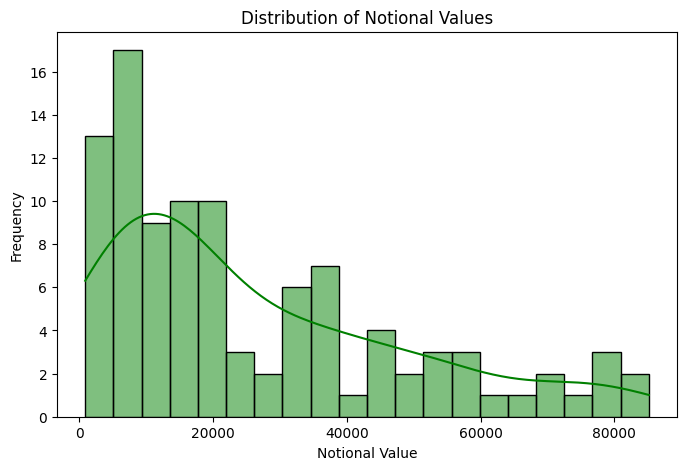

In [53]:
plt.figure(figsize=(8,5))
sns.histplot(df["notional_value"], bins=20, kde=True, color="green")
plt.title("Distribution of Notional Values")
plt.xlabel("Notional Value")
plt.ylabel("Frequency")
plt.show()


### Distribution of Notional Values

The histogram above illustrates the distribution of trade notional values.

**Key Observations:**
- The distribution is right-skewed, with a majority of trades clustered at lower notional values (below ~20,000).
- There is a long tail extending towards higher values, with some trades reaching above 80,000.
- The KDE curve smooths the distribution, confirming the concentration of smaller trades and gradual tapering off at higher values.

**Business Implications:**
- The prevalence of smaller-value trades suggests good liquidity and frequent trading activity.
- The few large notional trades may indicate significant financial exposure or strategic trades that require closer risk management.
- This spread in trade sizes emphasizes the need for differentiated risk monitoring approaches across trade sizes.

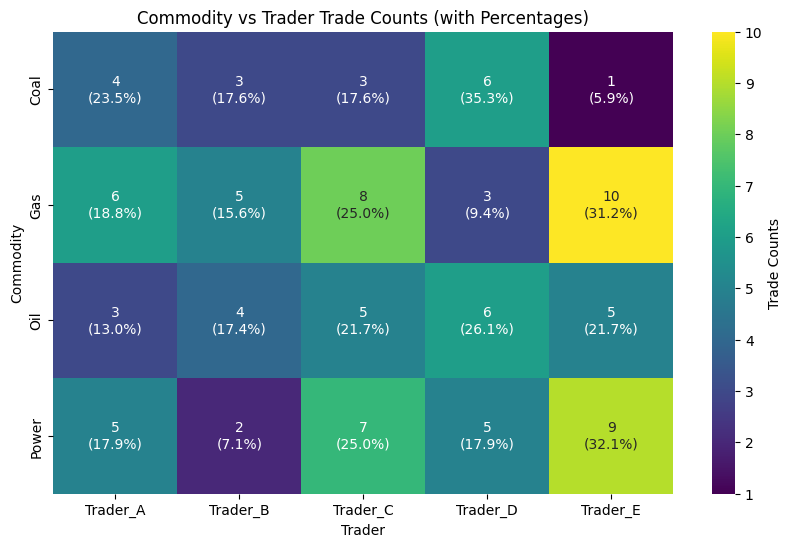

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute raw counts
heatmap_data = pd.crosstab(df["commodity"], df["trader"])

# Compute percentages (row-wise share per trader)
heatmap_percent = heatmap_data.div(heatmap_data.sum(axis=1), axis=0) * 100

# Create a combined annotation: count + percentage
annot_data = heatmap_data.astype(str) + "\n(" + heatmap_percent.round(1).astype(str) + "%)"

plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data,
    annot=annot_data,
    fmt="",
    cmap="viridis",
    cbar_kws={"label": "Trade Counts"}
)
plt.title("Commodity vs Trader Trade Counts (with Percentages)")
plt.ylabel("Commodity")
plt.xlabel("Trader")
plt.show()


### Commodity vs Trader Trade Counts (with Percentages)

The heatmap above displays the count of trades for each commodity across different traders, with percentage shares annotated within each cell.

**Key Insights:**
- **Trader_E** has the highest trade counts in *Gas* (10 trades, 31.2%) and *Power* (9 trades, 32.1%), showing a strong focus on these commodities.
- **Trader_D** dominates *Coal* trades (6 trades, 35.3%), indicating a specialization or strategic interest in coal.
- Trade distribution across *Oil* is relatively balanced, with no single trader significantly dominating.
- The percentages within each commodity row show how each trader contributes to that commodity's total trades, helping identify trader specialization.

**Business Implications:**
- Traders have distinct commodity preferences or responsibilities, which can inform risk management and strategic planning.
- The concentration of trades by certain traders in specific commodities may pose concentration risk.
- Balanced trade counts in *Oil* suggest diversified trader engagement, potentially lowering risk.

In [68]:
# Calculate trade duration in days
df["trade_duration"] = (df["deliveryend"] - df["deliverystart"]).dt.days

# Preview
df[["tradeid", "deliverystart", "deliveryend", "trade_duration"]].head()


,tradeid,deliverystart,deliveryend,trade_duration
0,1,2025-01-08,2025-01-16,8
1,2,2025-01-29,2025-02-16,18
2,3,2025-01-03,2025-01-10,7
3,4,2025-01-23,2025-02-13,21
4,5,2025-01-09,2025-02-04,26


  commodity  trade_duration
0      Coal       17.117647
1       Gas       12.156250
2       Oil       16.826087
3     Power       16.392857


C:\Users\Preeti\AppData\Local\Temp\ipykernel_19704\54938308.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="commodity", y="trade_duration", data=avg_duration, palette="viridis")


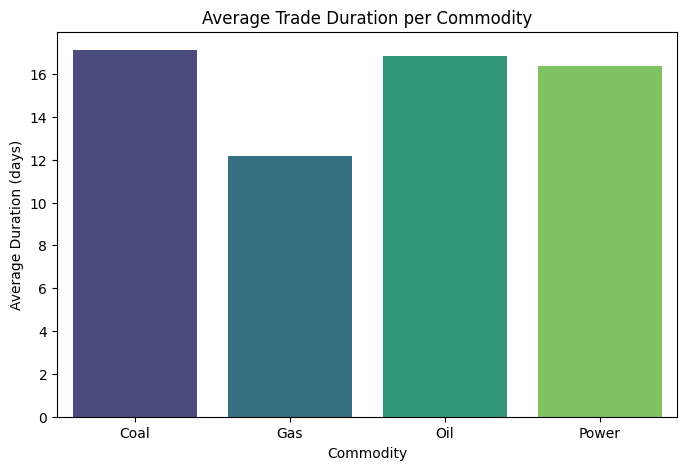

In [70]:
# Average trade duration per commodity
avg_duration = df.groupby("commodity")["trade_duration"].mean().reset_index()

print(avg_duration)  # just to check values

# Bar chart
plt.figure(figsize=(8,5))
sns.barplot(x="commodity", y="trade_duration", data=avg_duration, palette="viridis")
plt.title("Average Trade Duration per Commodity")
plt.xlabel("Commodity")
plt.ylabel("Average Duration (days)")
plt.show()


### Average Trade Duration per Commodity

The bar chart above illustrates the average trade duration (in days) for different commodities.

**Key Observations:**
- **Coal** has the longest average trade duration, approximately 17.1 days.
- **Oil** and **Power** follow closely, with average durations around 16.8 and 16.4 days respectively.
- **Gas** trades have the shortest average duration at about 12.2 days, indicating quicker turnover or shorter contracts.

**Insights:**
- The shorter trade duration for Gas could be due to market characteristics, such as higher volatility or more frequent contract renewals.
- Longer durations in Coal, Oil, and Power may reflect more stable or longer-term trading agreements.

**Business Implications:**
- Risk management strategies should consider the shorter duration and possibly higher frequency of Gas trades.
- Longer durations in other commodities suggest more extended exposure periods, requiring monitoring of longer-term market trends.

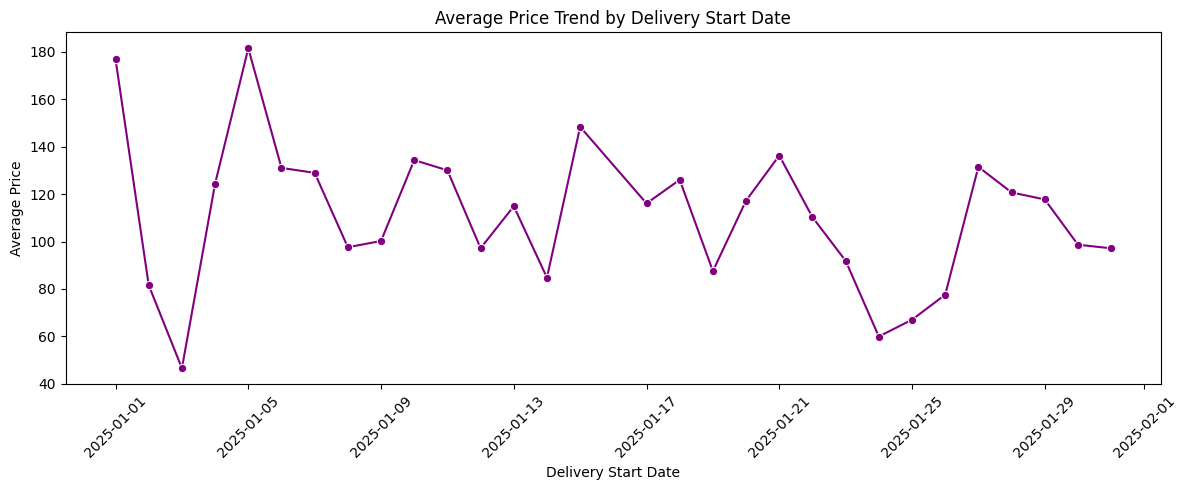

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure deliverystart is datetime
df["deliverystart"] = pd.to_datetime(df["deliverystart"], errors="coerce")

# Group by deliverystart and calculate average price
daily_avg_price = df.groupby("deliverystart")["price"].mean().reset_index()

# Plot
plt.figure(figsize=(12,5))
sns.lineplot(x="deliverystart", y="price", data=daily_avg_price, marker="o", color="purple")
plt.title("Average Price Trend by Delivery Start Date")
plt.xlabel("Delivery Start Date")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Average Price Trend by Delivery Start Date

The line chart above shows the average price trend over delivery start dates throughout January 2025.

**Key Observations:**
- Sharp fluctuations in average prices early in the month, with peaks around January 1st and January 5th.
- A significant dip around January 3rd indicates a sudden price drop.
- Prices stabilize mid-month, mostly fluctuating between 85 and 150.
- Late-month shows a decline and leveling off below 100.

**Insights:**
- Early-month volatility may be driven by seasonal demand, supply disruptions, or market reactions.
- Mid-month stabilization suggests more balanced supply-demand conditions.
- Late-month decline could reflect reduced demand or increased supply.

**Business Implications:**
- Pricing strategies should factor in high volatility at the start of the delivery period.
- Monitoring market signals early in the month could help anticipate price spikes or drops.
- Risk management should consider the late-month price decline for contract planning.

In [74]:
df.head()

,tradeid,commodity,tradetype,volume,price,currency,deliverystart,deliveryend,periodicity,trader,trade_duration_days,notional_value,trade_duration
0,1,Power,BUY,193.52,191.13,GBP,2025-01-08,2025-01-16,Monthly,Trader_E,8,36987.4776,8
1,2,Gas,BUY,368.68,127.76,GBP,2025-01-29,2025-02-16,Quarterly,Trader_E,18,47102.5568,18
2,3,Power,SELL,86.45,48.08,USD,2025-01-03,2025-01-10,Daily,Trader_A,7,4156.5160,7
3,4,Gas,BUY,38.46,175.91,GBP,2025-01-23,2025-02-13,Daily,Trader_C,21,6765.4986,21
4,5,Coal,BUY,304.55,147.45,EUR,2025-01-09,2025-02-04,Quarterly,Trader_D,26,44905.8975,26


In [77]:
# Calculate delivery duration in days
df["delivery_duration"] = (df["deliveryend"] - df["deliverystart"]).dt.days

# Quick check
df[["tradeid", "deliverystart", "deliveryend", "delivery_duration"]].head()


,tradeid,deliverystart,deliveryend,delivery_duration
0,1,2025-01-08,2025-01-16,8
1,2,2025-01-29,2025-02-16,18
2,3,2025-01-03,2025-01-10,7
3,4,2025-01-23,2025-02-13,21
4,5,2025-01-09,2025-02-04,26


C:\Users\Preeti\AppData\Local\Temp\ipykernel_19704\1821960293.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="commodity", y="delivery_duration", palette="Set3")


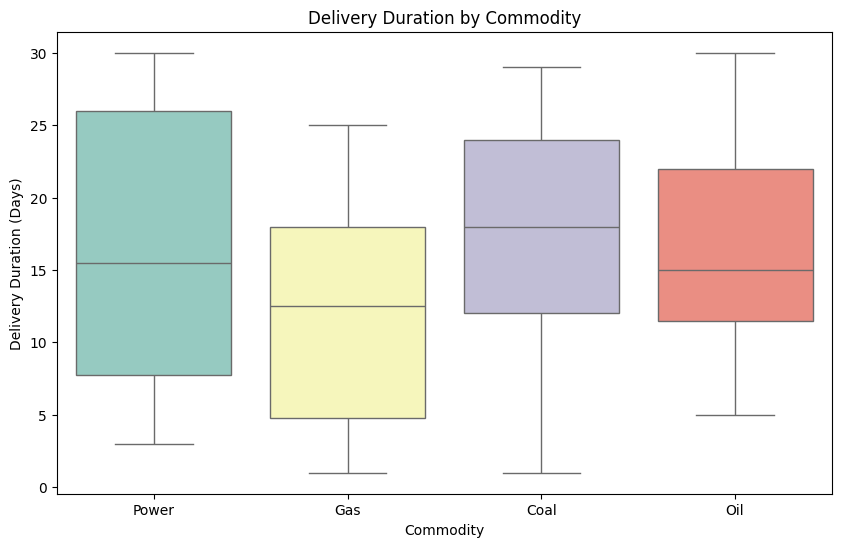

In [79]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="commodity", y="delivery_duration", palette="Set3")
plt.title("Delivery Duration by Commodity")
plt.xlabel("Commodity")
plt.ylabel("Delivery Duration (Days)")
plt.show()


### Delivery Duration by Commodity

The box plot above illustrates the delivery duration (in days) distribution across different commodities.

**Key Observations:**
- **Power** and **Oil** have the highest median delivery durations, around 15-16 days.
- **Coal** shows a similar median duration but with a wider spread, indicating more variability.
- **Gas** has the lowest median delivery duration, with many deliveries taking fewer than 10 days.
- All commodities show a wide range in delivery durations, with some outliers reaching close to 30 days.

**Insights:**
- Longer delivery durations for Power and Oil may suggest more complex logistics or contract terms.
- The variability in Coal delivery durations could be due to diverse sourcing or transportation challenges.
- Shorter delivery times for Gas may reflect its nature as a more flexible or spot-traded commodity.

**Business Implications:**
- Planning and scheduling should account for longer and more variable delivery durations in Coal, Power, and Oil.
- Gas deliveries could benefit from faster turnaround strategies or more frequent contract cycles.
- Understanding delivery duration variability helps optimize inventory and reduce supply chain risks.

<Figure size 1000x600 with 0 Axes>

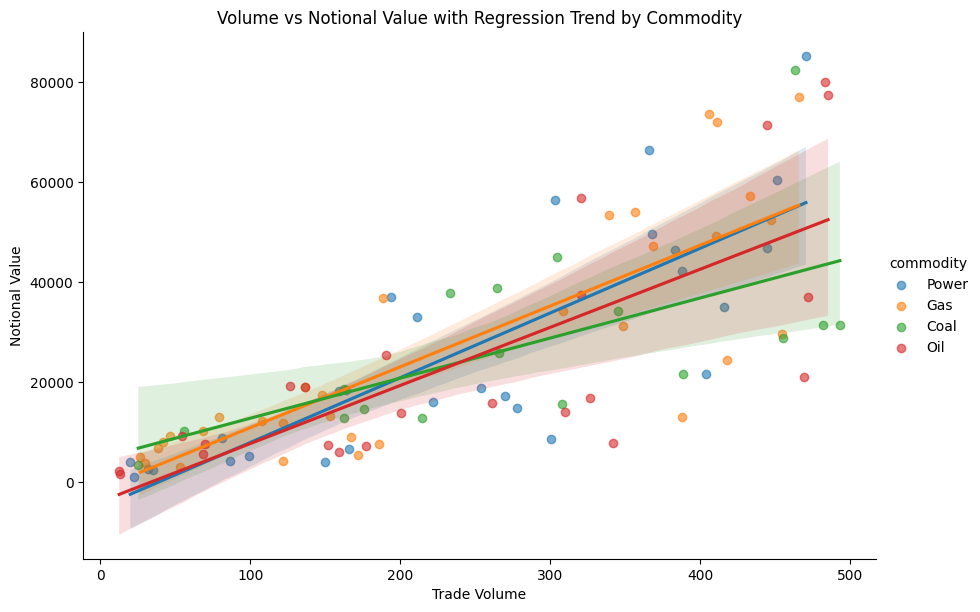

In [83]:
plt.figure(figsize=(10,6))
sns.lmplot(
    data=df,
    x="volume",
    y="notional_value",
    hue="commodity",
    palette="tab10",
    height=6,
    aspect=1.5,
    scatter_kws={"alpha":0.6}
)

plt.title("Volume vs Notional Value with Regression Trend by Commodity")
plt.xlabel("Trade Volume")
plt.ylabel("Notional Value")
plt.show()


### Volume vs Notional Value with Regression Trend by Commodity

The scatter plot with regression lines shows the relationship between trade volume and notional value for different commodities.

**Key Observations:**
- There is a strong positive correlation between trade volume and notional value across all commodities.
- **Power** and **Gas** have steeper regression slopes, indicating higher notional values per unit volume.
- **Coal** shows a gentler slope, suggesting lower notional value for similar volumes.
- The scatter points indicate variability, especially for higher trade volumes.

**Insights:**
- The stronger correlation supports that higher trade volumes generally lead to higher transaction values.
- Differences in slopes may reflect commodity price differences or contract structures.
- The variability at higher volumes might be due to market fluctuations or large, infrequent trades.

**Business Implications:**
- Pricing and risk models should incorporate the volume-value relationship to forecast revenues.
- Commodities with steeper slopes could provide higher returns for increasing volumes.
- Understanding variability helps in managing exposure to large trades and market volatility.

### Conclusion

The analysis shows that **Power** and **Gas** dominate the trade market, **USD** is the most common currency, and most contracts are **monthly**. A few traders dominate large volumes, and outlier trades exist with very high notional values. The dataset reflects realistic ETRM trading behavior with meaningful variability in commodity pricing and trade periodicity.